# Philippine Presidential Race 2022 Prediction
## Facial Feature Based
The main objective of the project is to connect seemingly...

In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                    accuracy_score,f1_score, precision_score, recall_score)

In [2]:
#importing data
df = pd.read_excel("prestest.xlsx")
df

,Left Brow Solidity,Right Brow Solidity,Left Eye Eccentricity,Right Eye Eccentricity,Nose Solidity,Mouth Eccentricity,Jawline Solidity,Target
0,0.943729,0.950178,0.968172,0.968897,0.747776,0.970832,0.993939,0.0
1,0.952281,0.950768,0.979336,0.978043,0.634295,0.939898,0.993999,0.0
2,0.942395,0.950756,0.981485,0.979080,0.689418,0.979536,0.993871,0.0
3,0.934495,0.947331,0.970957,0.964015,0.574785,0.921601,0.994196,0.0
4,0.959522,0.952125,0.955476,0.955192,0.591652,0.969192,0.994240,0.0
...,...,...,...,...,...,...,...,...
159,0.946150,0.949383,0.902869,0.883445,0.573174,0.931218,0.993837,NaN
160,0.938807,0.935676,0.957719,0.966944,0.799055,0.933396,0.993509,NaN
161,0.945864,0.952742,0.913217,0.925900,0.639064,0.936268,0.993534,NaN
162,0.947332,0.943137,0.941831,0.955273,0.623164,0.933462,0.992902,NaN


In [3]:
predict_set = df.drop(range(0,130))
predict_set = predict_set.drop('Target',axis=1)

mms = MinMaxScaler()
stdsc = StandardScaler()

ps_norm = mms.fit_transform(predict_set)
ps_std = stdsc.fit_transform(predict_set)

pd.DataFrame(ps_norm)

,0,1,2,3,4,5,6
0,0.371157,0.289987,0.615121,0.577213,0.520321,1.000000,0.370630
1,0.000000,0.438891,0.611712,0.579219,0.427948,0.968157,0.219980
2,0.012849,0.249241,0.470341,0.543494,0.649670,0.937100,0.449884
3,0.047214,0.391746,0.348981,0.512510,0.624789,0.857293,0.155750
4,0.063871,0.374948,0.617919,0.570622,0.462292,0.861148,0.060441
5,0.036597,0.389274,0.730589,0.654777,0.461204,0.906844,0.570957
6,0.646201,0.802635,0.386686,0.223005,0.089574,0.883495,0.570420
7,0.033417,0.289088,0.278070,0.398438,0.816276,0.901744,0.070161
8,0.453122,0.699883,0.688115,0.749892,0.664379,0.894799,0.000000
9,0.485846,0.538072,0.919905,1.000000,0.848469,0.877972,0.196502


In [4]:
df = df.dropna(axis = 0)
df.isnull().sum()

Left Brow Solidity        0
Right Brow Solidity       0
Left Eye Eccentricity     0
Right Eye Eccentricity    0
Nose Solidity             0
Mouth Eccentricity        0
Jawline Solidity          0
Target                    0
dtype: int64

In [5]:
X = df.drop('Target',axis=1).fillna(0) 
y = df['Target']

mms = MinMaxScaler()
stdsc = StandardScaler()

X_norm = mms.fit_transform(X)
X_std = stdsc.fit_transform(X)

## kNN Classifier

### Basic Iteration

In [6]:
train_acc = []
test_acc = []
k = 20
neighbors_settings = range(1, k)
# model iterating 20 times
for i in range(20):

    X_train, X_test, y_train, y_test = train_test_split(X_norm,y, stratify=y,
                                                    test_size=0.25)


    for n_neighbors in neighbors_settings:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train, y_train)
        train_acc.append(knn.score(X_train, y_train))
        test_acc.append(knn.score(X_test, y_test))

    
pass

In [7]:
sm = SMOTE()
X_smknn, y_smknn = sm.fit_resample(X_train, y_train)

### SMOTE Iteration

In [8]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,30,1):
    X_train, X_test, y_train, y_test = train_test_split(X_smknn, y_smknn, stratify=y_smknn, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 30)

    for neighbors in neighbors_settings:   
        knn = KNeighborsClassifier(
            n_neighbors = neighbors
        )  
        knn.fit(X_train, y_train)

        training_accuracy.append(knn.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(knn.score(X_test, y_test))   # record generalization accuracy
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Average Test Set Achieved = 0.774955
Best n_neighbors Parameters = 1


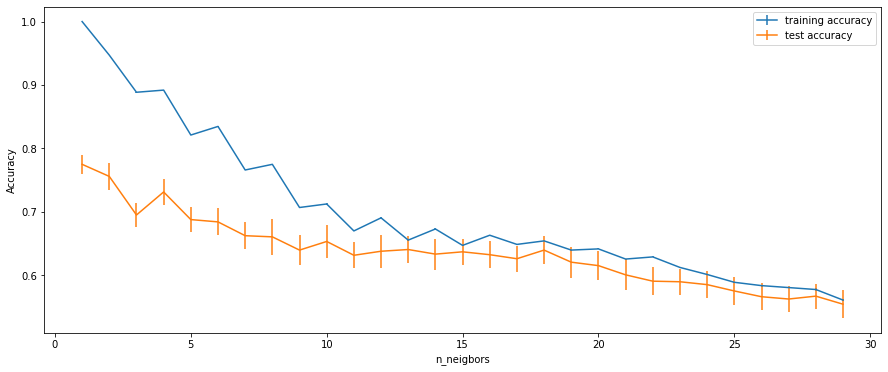

In [9]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/3, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neigbors")
plt.legend()

bestneighbors=np.argmax(lahat_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best n_neighbors Parameters = %d" %bestneighbors )

Confusion Matrix


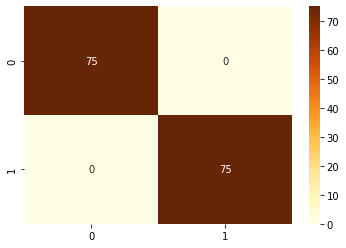

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        75
         1.0       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Accuracy: 100.0 %


In [10]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_smknn,y_smknn)

print('Confusion Matrix')
conf=confusion_matrix(y_smknn, np.round(knn.predict(X_smknn) ) )     
sns.heatmap(conf, annot=True, cmap='YlOrBr')
plt.show()

print('Classification Report')
classrep=classification_report(y_smknn, np.round(knn.predict(X_smknn)))
print(classrep)


accuracy = round(accuracy_score(y_smknn, np.round(knn.predict(X_smknn))) * 100,2)
print('Accuracy:', accuracy,'%')

## Decision Tree

### MAIN Iteration

In [11]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,20,1):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    max_depth_settings = range(1, 50) # try n_neighbors from 1 to 50

    for depth in max_depth_settings:   
        tree = DecisionTreeClassifier(
            max_depth = depth,
            min_samples_leaf = 4,
            max_features = 'auto',
            random_state = seedN
        )
        tree.fit(X_train, y_train)

        training_accuracy.append(tree.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(tree.score(X_test, y_test))   # record generalization accuracy
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

In [12]:
sm = SMOTE()
X_smdtc, y_smdtc = sm.fit_resample(X_train, y_train)

### SMOTE Iteration

In [13]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,30,1):
    X_train, X_test, y_train, y_test = train_test_split(X_smdtc,y_smdtc, stratify=y_smdtc, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    max_depth_settings = range(1, 50) # try n_neighbors from 1 to 50

    for depth in max_depth_settings:   
        tree = DecisionTreeClassifier(
            max_depth = depth,
            min_samples_leaf = 4,
            max_features = 'auto',
            random_state = seedN
        )
        tree.fit(X_train, y_train)

        training_accuracy.append(tree.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(tree.score(X_test, y_test))   # record generalization accuracy
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Average Test Set Achieved = 0.676951
Best max_depth Parameters = 6


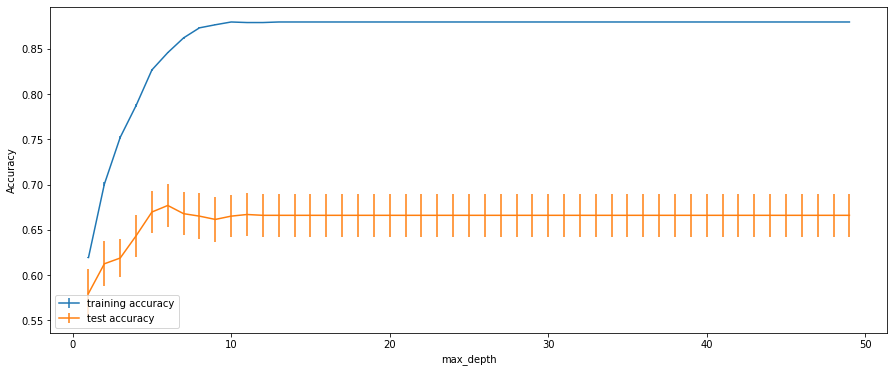

In [14]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(max_depth_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy")
plt.errorbar(max_depth_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/3, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

bestdepth=np.argmax(lahat_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best max_depth Parameters = %d" %bestdepth )

Confusion Matrix


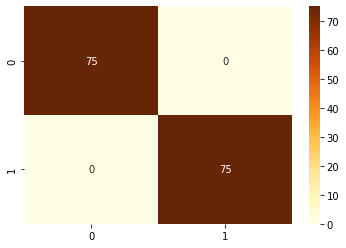

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        75
         1.0       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Accuracy: 100.0 %


In [15]:
dtc = DecisionTreeClassifier().fit(X_smdtc,y_smdtc)
    
print('Confusion Matrix')
conf=confusion_matrix(y_smdtc, np.round(dtc.predict(X_smdtc) ) )     
sns.heatmap(conf, annot=True, cmap="YlOrBr")
plt.show()

print('Classification Report')
classrep=classification_report(y_smdtc, np.round(dtc.predict(X_smdtc)))
print(classrep)


accuracy = round(accuracy_score(y_smdtc, np.round(dtc.predict(X_smdtc))) * 100,2)
print('Accuracy:', accuracy,'%')

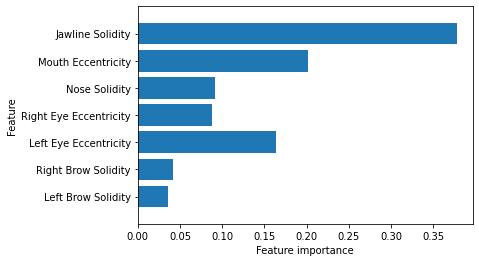

In [16]:
def plot_feature_importances_upcat(model):
    n_features=X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)
    
plot_feature_importances_upcat(tree)

## Random Forest

### Main Iteration

In [17]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,20,1):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    estimators_settings = range(1, 50)

    for estimators in estimators_settings:   
        forest = RandomForestClassifier(
            n_estimators = estimators,
            max_depth = 4,
            min_samples_leaf = 2,
            random_state = seedN
        )  
        forest.fit(X_train, y_train)

        training_accuracy.append(forest.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(forest.score(X_test, y_test))   # record generalization accuracy
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

In [18]:
sm = SMOTE()
X_smforest, y_smforest = sm.fit_resample(X_train, y_train)

### SMOTE Iteration

In [19]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,30,1):
    X_train, X_test, y_train, y_test = train_test_split(X_smforest, y_smforest, stratify=y_smforest, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    estimators_settings = range(1, 50)

    for estimators in estimators_settings:   
        forest = RandomForestClassifier(
            n_estimators = estimators,
            max_depth = 4,
            min_samples_leaf = 2,
            random_state = seedN
        )  
        forest.fit(X_train, y_train)

        training_accuracy.append(forest.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(forest.score(X_test, y_test))   # record generalization accuracy
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Average Test Set Accuracy Achieved = 0.734120
Best n_estimators Parameter = 47


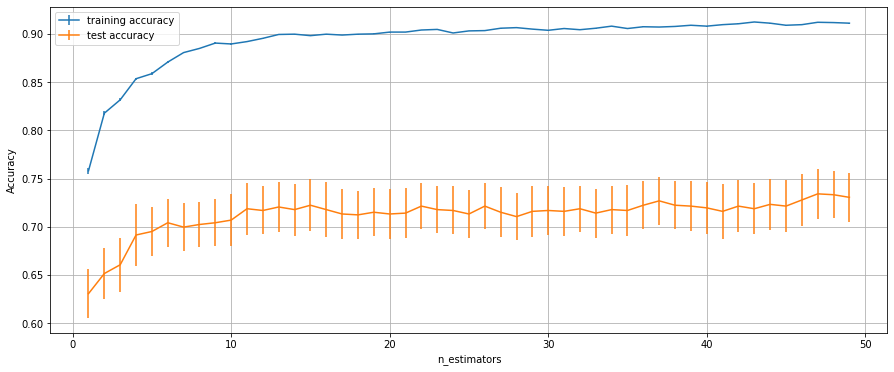

In [20]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(estimators_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy")
plt.errorbar(estimators_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/3, label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()
plt.grid()

bestestimator=np.argmax(lahat_test.mean(axis=1))+1
print("Highest Average Test Set Accuracy Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best n_estimators Parameter = %d" %bestestimator )

Confusion Matrix


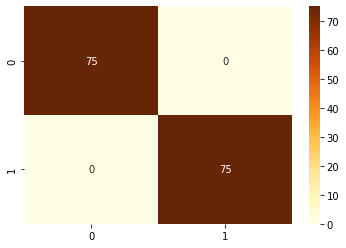

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        75
         1.0       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Accuracy: 100.0 %


In [21]:
rfc = RandomForestClassifier().fit(X_smforest,y_smforest)
    
print('Confusion Matrix')
conf=confusion_matrix(y_smforest, np.round(rfc.predict(X_smforest) ) )     
sns.heatmap(conf, annot=True, cmap="YlOrBr")
plt.show()

print('Classification Report')
classrep=classification_report(y_smforest, np.round(rfc.predict(X_smforest)))
print(classrep)


accuracy = round(accuracy_score(y_smforest, np.round(rfc.predict(X_smforest))) * 100,2)
print('Accuracy:', accuracy,'%')

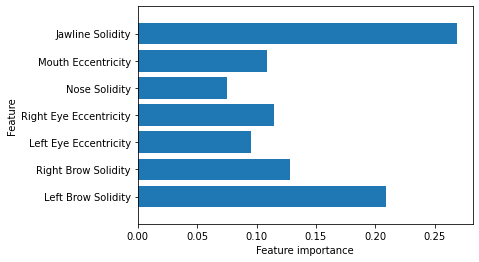

In [22]:
plot_feature_importances_upcat(forest)

In [23]:
pcc=(df.groupby('Target').size()/df.groupby('Target').size().sum())**2
print("Proportion Chance Criterion = {}%".format(100*pcc.sum()))
print("1.25 Proportion Chance Criterion = {}%".format(1.25*100*pcc.sum()))

Proportion Chance Criterion = 65.33727810650888%
1.25 Proportion Chance Criterion = 81.6715976331361%


# MAIN PREDICTION

In [24]:
def listToString(s): 
    str1 = "" 
    for ele in s: 
        str1 += ele  
    return str1 

def predict_win(X):
    ynew = forest.predict_proba(X)
    prob_output = ynew[0]
    ylist = listToString(str(prob_output))
    ysplit = ylist.split()
    score = ysplit[1]
    return float(score[:-1])*100

RDuterte = pd.DataFrame(X_norm).iloc[108:115]
FRamos = pd.DataFrame(X_norm).iloc[5:10]
JEstrada = pd.DataFrame(X_norm).iloc[42:49]
BAquino = pd.DataFrame(X_norm).iloc[80:87]

BGo = pd.DataFrame(ps_norm).iloc[0:6]
EAbella = pd.DataFrame(ps_norm).iloc[6:11]
BMarcos = pd.DataFrame(ps_norm).iloc[11:17]
MPacquiao = pd.DataFrame(ps_norm).iloc[17:22]
IMoreno = pd.DataFrame(ps_norm).iloc[22:27]
LRobredo = pd.DataFrame(ps_norm).iloc[27:33]

print("Duterte:",predict_win(RDuterte),"%")
print("Aquino:",predict_win(BAquino),"%")
print("Ramos:",predict_win(FRamos),"%")
print("Estrada",predict_win(JEstrada),"%")
print()
print("Marcos:",predict_win(BMarcos),"%")
print("Robredo:",predict_win(LRobredo),"%")
print("Go:",predict_win(BGo),"%")
print("Abella:",predict_win(EAbella),"%")
print("Pacquiao:",predict_win(MPacquiao),"%")
print("Moreno:",predict_win(IMoreno),"%")

Duterte: 50.024771 %
Aquino: 71.392651 %
Ramos: 57.919667 %
Estrada 77.559173 %

Marcos: 54.868618999999995 %
Robredo: 50.172522 %
Go: 46.211662 %
Abella: 25.321462 %
Pacquiao: 22.181327 %
Moreno: 22.662013 %
